In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest_android = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_2.csv')
back3 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_3.csv')

forward = pd.concat([forward_android3, forward_android4, forward_android5])
back = pd.concat([back1, back2, back3])

dataDF = pd.concat([forward, back])

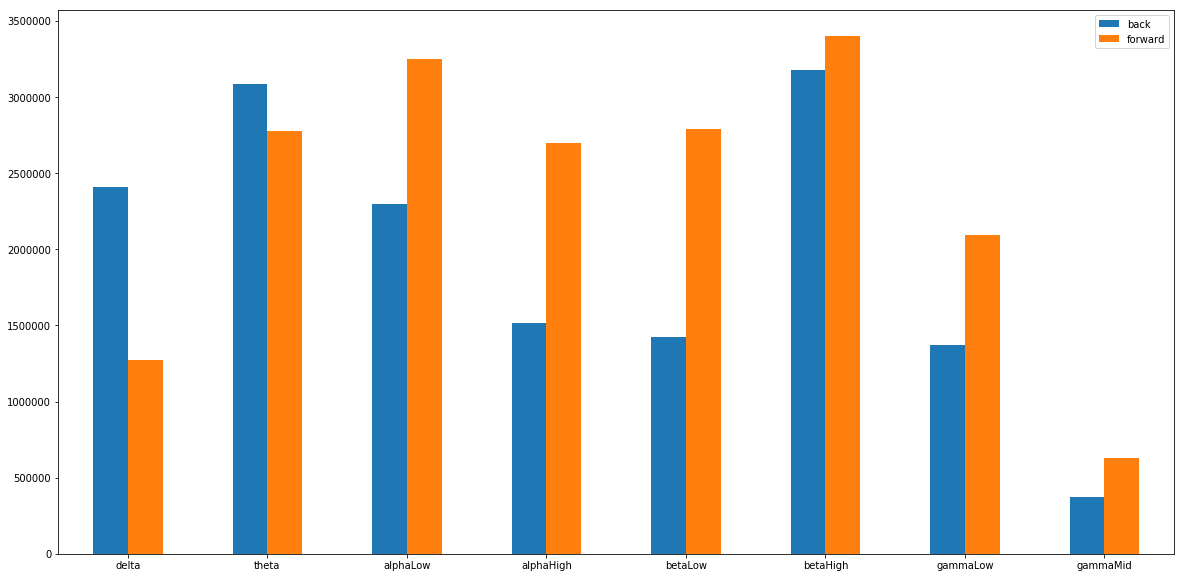

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [back.delta.mean(), back.theta.mean(), back.alphaLow.mean(), 
     back.betaHigh.mean(), back.betaLow.mean(), back.alphaHigh.mean(), 
     back.gammaLow.mean(), back.gammaMid.mean()]

d = [forward.delta.mean(), forward.theta.mean(), forward.alphaLow.mean(), 
     forward.betaHigh.mean(), forward.betaLow.mean(), forward.alphaHigh.mean(), 
     forward.gammaLow.mean(), forward.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'back': u, 'forward': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [3]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

[0.22042284 0.14594739 0.10373953 0.09494873 0.10523178 0.09295838
 0.10846624 0.12828511]
The score for Random Forest  0.6508620689655172
1392
Accuracy for x_test: 0.6508620689655172


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selec

Cross Validation Accuracy: 0.62 (+/- 0.22)
[0.44919786 0.47058824 0.52406417 0.53513514 0.69189189 0.74054054
 0.67027027 0.75675676 0.67567568 0.6972973 ]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


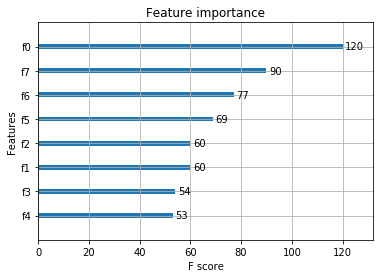

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.7068965517241379
Accuracy for x_test: 0.7068965517241379
Accuracy: 70.69%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.68 (+/- 0.33)
[0.44385027 0.44919786 0.51871658 0.54594595 0.82162162 0.87027027
 0.74054054 0.82702703 0.78918919 0.82702703]


In [5]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# plot feature importance
plot_importance(xgb)
pyplot.show()
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

In [6]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

# Model Tuning and feature importance XGBoost

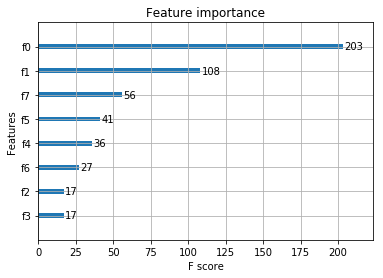

The score for XGBoost  0.6767241379310345
Accuracy for x_test: 0.6767241379310345
Accuracy: 67.67%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.69 (+/- 0.33)
[0.43315508 0.45454545 0.51336898 0.57297297 0.82162162 0.87567568
 0.75135135 0.84324324 0.78378378 0.81621622]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.034, n=8, Accuracy: 67.67%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.034, n=8, Accuracy: 67.67%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.053, n=6, Accuracy: 68.32%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.071, n=5, Accuracy: 67.24%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.081, n=4, Accuracy: 68.53%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.111, n=3, Accuracy: 68.32%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.214, n=2, Accuracy: 68.75%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.402, n=1, Accuracy: 68.75%


In [7]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
xgb.fit(x_train, y_train)
# plot feature importance
plot_importance(xgb)
pyplot.show()
# print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total para

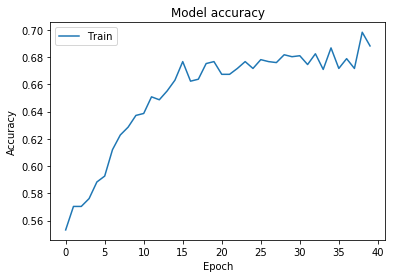

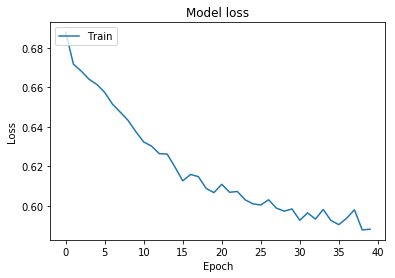

In [8]:
from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(16, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(16, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.0004),
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=40, verbose=1, batch_size=3)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(16, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(64, activation="relu"))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.00038),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 5,425
Trainable params: 5,425
Non-trainable params: 0
_______

Epoch 2/40
1335/1335 [==============================] - 1s 685us/step - loss: 0.6461 - acc: 0.6352 - val_loss: 0.9476 - val_acc: 0.0000e+00
Epoch 3/40
1335/1335 [==============================] - 1s 728us/step - loss: 0.6424 - acc: 0.6360 - val_loss: 0.9159 - val_acc: 0.0359
Epoch 4/40
1335/1335 [==============================] - 1s 678us/step - loss: 0.6394 - acc: 0.6479 - val_loss: 0.9210 - val_acc: 0.1198
Epoch 5/40
1335/1335 [==============================] - 1s 641us/step - loss: 0.6359 - acc: 0.6599 - val_loss: 0.8713 - val_acc: 0.1497
Epoch 6/40
1335/1335 [==============================] - 1s 613us/step - loss: 0.6330 - acc: 0.6599 - val_loss: 0.8420 - val_acc: 0.1766
Epoch 7/40
1335/1335 [==============================] - 1s 604us/step - loss: 0.6327 - acc: 0.6614 - val_loss: 0.8886 - val_acc: 0.1557
Epoch 8/40
1335/1335 [==============================] - 1s 700us/step - loss: 0.6299 - acc: 0.6607 - val_loss: 0.8766 - val_acc: 0.1497
Epoch 9/40
1335/1335 [======================

Epoch 12/40
1335/1335 [==============================] - 1s 673us/step - loss: 0.6278 - acc: 0.6592 - val_loss: 0.8930 - val_acc: 0.1527
Epoch 13/40
1335/1335 [==============================] - 1s 689us/step - loss: 0.6267 - acc: 0.6607 - val_loss: 0.9168 - val_acc: 0.1527
Epoch 14/40
1335/1335 [==============================] - 1s 691us/step - loss: 0.6259 - acc: 0.6599 - val_loss: 0.8789 - val_acc: 0.1527
Epoch 15/40
1335/1335 [==============================] - 1s 772us/step - loss: 0.6233 - acc: 0.6644 - val_loss: 0.8926 - val_acc: 0.1527
Epoch 16/40
1335/1335 [==============================] - 1s 749us/step - loss: 0.6226 - acc: 0.6607 - val_loss: 0.8666 - val_acc: 0.1527
Epoch 17/40
1335/1335 [==============================] - 1s 643us/step - loss: 0.6212 - acc: 0.6674 - val_loss: 0.8951 - val_acc: 0.1557
Epoch 18/40
1335/1335 [==============================] - 1s 725us/step - loss: 0.6197 - acc: 0.6652 - val_loss: 0.8552 - val_acc: 0.1707s - loss: 0.6197 - acc: 0.665
Epoch 19/40


1336/1336 [==============================] - 1s 581us/step - loss: 0.6293 - acc: 0.6669 - val_loss: 0.9579 - val_acc: 0.1552
Epoch 22/40
1336/1336 [==============================] - 1s 551us/step - loss: 0.6287 - acc: 0.6632 - val_loss: 0.9141 - val_acc: 0.1672
Epoch 23/40
1336/1336 [==============================] - 1s 545us/step - loss: 0.6275 - acc: 0.6684 - val_loss: 0.9636 - val_acc: 0.1522
Epoch 24/40
1336/1336 [==============================] - 1s 744us/step - loss: 0.6265 - acc: 0.6669 - val_loss: 0.9056 - val_acc: 0.1701
Epoch 25/40
1336/1336 [==============================] - 1s 613us/step - loss: 0.6257 - acc: 0.6654 - val_loss: 0.9186 - val_acc: 0.1701
Epoch 26/40
1336/1336 [==============================] - 1s 609us/step - loss: 0.6253 - acc: 0.6669 - val_loss: 0.9371 - val_acc: 0.1701
Epoch 27/40
1336/1336 [==============================] - 1s 676us/step - loss: 0.6253 - acc: 0.6677 - val_loss: 0.8767 - val_acc: 0.1701
Epoch 28/40
1336/1336 [==============================

Epoch 31/40
1336/1336 [==============================] - 1s 662us/step - loss: 0.6430 - acc: 0.6452 - val_loss: 0.9211 - val_acc: 0.1493
Epoch 32/40
1336/1336 [==============================] - 1s 703us/step - loss: 0.6416 - acc: 0.6497 - val_loss: 1.0253 - val_acc: 0.1164
Epoch 33/40
1336/1336 [==============================] - 1s 817us/step - loss: 0.6425 - acc: 0.6460 - val_loss: 0.9259 - val_acc: 0.1493
Epoch 34/40
1336/1336 [==============================] - 1s 710us/step - loss: 0.6428 - acc: 0.6467 - val_loss: 0.9513 - val_acc: 0.1493
Epoch 35/40
1336/1336 [==============================] - 1s 789us/step - loss: 0.6417 - acc: 0.6475 - val_loss: 1.0046 - val_acc: 0.1463
Epoch 36/40
1336/1336 [==============================] - 1s 782us/step - loss: 0.6420 - acc: 0.6490 - val_loss: 0.9491 - val_acc: 0.1493
Epoch 37/40
1336/1336 [==============================] - 1s 763us/step - loss: 0.6414 - acc: 0.6490 - val_loss: 0.9801 - val_acc: 0.1463
Epoch 38/40
1336/1336 [==================

185/185 [==============================] - 0s 49us/step
Average accuracy of model on the dev set =  0.5261598496351328
Training on fold 7/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_49 (Dense)      

1336/1336 [==============================] - 3s 2ms/step - loss: 0.6577 - acc: 0.6355 - val_loss: 0.9612 - val_acc: 0.0000e+00
Epoch 2/40
1336/1336 [==============================] - 1s 757us/step - loss: 0.6552 - acc: 0.6355 - val_loss: 0.9943 - val_acc: 0.0000e+00
Epoch 3/40
1336/1336 [==============================] - 1s 779us/step - loss: 0.6537 - acc: 0.6355 - val_loss: 0.9798 - val_acc: 0.0000e+00
Epoch 4/40
1336/1336 [==============================] - 1s 863us/step - loss: 0.6516 - acc: 0.6347 - val_loss: 0.9710 - val_acc: 0.0448
Epoch 5/40
1336/1336 [==============================] - 1s 816us/step - loss: 0.6500 - acc: 0.6430 - val_loss: 0.9431 - val_acc: 0.1582
Epoch 6/40
1336/1336 [==============================] - 1s 845us/step - loss: 0.6485 - acc: 0.6460 - val_loss: 0.9381 - val_acc: 0.1582
Epoch 7/40
1336/1336 [==============================] - 1s 758us/step - loss: 0.6473 - acc: 0.6460 - val_loss: 0.9031 - val_acc: 0.1612
Epoch 8/40
1336/1336 [===========================

Epoch 11/40
1336/1336 [==============================] - 1s 851us/step - loss: 0.6482 - acc: 0.6475 - val_loss: 0.9370 - val_acc: 0.1672
Epoch 12/40
1336/1336 [==============================] - 1s 839us/step - loss: 0.6471 - acc: 0.6475 - val_loss: 0.9655 - val_acc: 0.1672
Epoch 13/40
1336/1336 [==============================] - 1s 881us/step - loss: 0.6472 - acc: 0.6460 - val_loss: 0.9233 - val_acc: 0.1672
Epoch 14/40
1336/1336 [==============================] - 1s 952us/step - loss: 0.6459 - acc: 0.6467 - val_loss: 1.0374 - val_acc: 0.1672
Epoch 15/40
1336/1336 [==============================] - 1s 854us/step - loss: 0.6457 - acc: 0.6490 - val_loss: 0.9051 - val_acc: 0.1672
Epoch 16/40
1336/1336 [==============================] - 1s 891us/step - loss: 0.6451 - acc: 0.6460 - val_loss: 0.9777 - val_acc: 0.1672 - loss: 0.6547 - acc: 0. - ETA: 0s - loss: 0.6504 - acc: 0.
Epoch 17/40
1336/1336 [==============================] - 1s 975us/step - loss: 0.6451 - acc: 0.6482 - val_loss: 1.0266

1336/1336 [==============================] - 1s 805us/step - loss: 0.6413 - acc: 0.6527 - val_loss: 0.9307 - val_acc: 0.1701
Epoch 21/40
1336/1336 [==============================] - 1s 813us/step - loss: 0.6412 - acc: 0.6527 - val_loss: 0.9158 - val_acc: 0.1731
Epoch 22/40
1336/1336 [==============================] - 1s 862us/step - loss: 0.6405 - acc: 0.6527 - val_loss: 0.9076 - val_acc: 0.1731
Epoch 23/40
1336/1336 [==============================] - 1s 927us/step - loss: 0.6383 - acc: 0.6504 - val_loss: 0.8575 - val_acc: 0.2000
Epoch 24/40
1336/1336 [==============================] - 1s 824us/step - loss: 0.6390 - acc: 0.6512 - val_loss: 0.9350 - val_acc: 0.1731
Epoch 25/40
1336/1336 [==============================] - 1s 774us/step - loss: 0.6379 - acc: 0.6504 - val_loss: 0.8795 - val_acc: 0.1940
Epoch 26/40
1336/1336 [==============================] - 1s 763us/step - loss: 0.6388 - acc: 0.6542 - val_loss: 0.8901 - val_acc: 0.2000
Epoch 27/40
1336/1336 [==============================